In [6]:
# import relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV
from sklearn.model_selection import train_test_split, KFold, RepeatedKFold, cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error
from yellowbrick.datasets import load_concrete
from yellowbrick.regressor import AlphaSelection, ManualAlphaSelection

In [7]:
# load data set
df_train = pd.read_csv('train.csv')
y = pd.DataFrame(df_train['y'])
X = pd.DataFrame(df_train.drop(df_train.columns[[0,1]],axis=1))

In [8]:
# feature transformation

# quadratic x6-x10
X_squared = X**2
X_squared.columns=['x6', 'x7','x8', 'x9', 'x10']
X_trafo = pd.concat([X, X_squared],axis=1)

# exponential x11-x15
X_exp = np.exp(X)
X_exp.columns=['x11', 'x12','x13', 'x14', 'x15']
X_trafo = pd.concat([X_trafo, X_exp],axis=1)

# cosine x16-x20
X_cos = np.cos(X)
X_cos.columns=['x16', 'x17','x18', 'x19', 'x20']
X_trafo = pd.concat([X_trafo, X_cos],axis=1)

# constant x21
X_trafo['x21'] = np.ones_like(700)


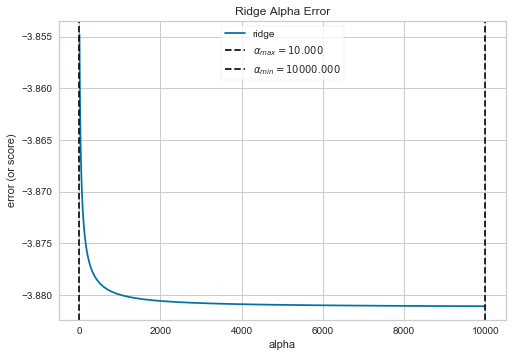

In [9]:
# split train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_trafo, y, test_size=0.2, random_state=42)

# create a list of alphas to cross-validate against (https://www.scikit-yb.org/en/latest/api/regressor/alphas.html)
alphas = np.logspace(1, 4, 50)

# Instantiate the visualizer
visualizer = ManualAlphaSelection(
    Ridge(),
    alphas=alphas,
    cv=12,
    scoring="neg_mean_squared_error"
)
visualizer.fit(X_trafo, y)
visualizer.show()

In [10]:
# fit model and predict
ridge_regr = Ridge(alpha=10000, fit_intercept=False, max_iter=10000, tol=0.0000001).fit(X_train, y_train)
y_pred = ridge_regr.predict(X_test)

RMSE_train = np.sqrt(mean_squared_error(y_train, y_train))
RMSE_test = np.sqrt(mean_squared_error(y_test, y_pred))
print('RMSE training data: %s' % RMSE_train)
print('RMSE test data: %s' % RMSE_test)

# write the predictions to the submission file

weights_df=pd.DataFrame(data=np.transpose(ridge_regr.coef_))
weights_df.to_csv('submission.csv', index=False, header=False)

RMSE training data: 0.0
RMSE test data: 4.238569392392538
